## Import Modules

In [29]:
from fbprophet import Prophet
import pandas as pd

## Initiate Model

In [30]:
model = Prophet(changepoint_prior_scale=0.01)

## Read Data

In [41]:
df = pd.read_csv('final_lf_data.csv')

In [42]:
df

,Unnamed: 0,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,0,7224.17,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,1,7141.92,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,2,7121.93,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,3,7066.64,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,4,6937.04,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192317,192317,8537.11,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:00:00
192318,192318,8554.19,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:15:00
192319,192319,8536.29,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:30:00
192320,192320,8510.32,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:45:00


In [43]:
df.head()

,Unnamed: 0,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,0,7224.17,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,1,7141.92,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,2,7121.93,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,3,7066.64,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,4,6937.04,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:15:00


In [44]:
df['Date'] = pd.to_datetime(df['Date'])

In [45]:
df

,Unnamed: 0,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,0,7224.17,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,1,7141.92,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,2,7121.93,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,3,7066.64,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,4,6937.04,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1,2016-10-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192317,192317,8537.11,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:00:00
192318,192318,8554.19,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:15:00
192319,192319,8536.29,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:30:00
192320,192320,8510.32,9,3,29.0,26.8,87.64,7.8,82,2.6,70.3,2021,9,2021-09-09 23:45:00


## Multivariate Forecasting

In [46]:
dfmv = df[['Date', 'Haryana Load (MW)', 'temp', 'dew', 'humidity', 'cloudcover', 'windspeed', 'winddir']]

In [47]:
dfmv

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0
...,...,...,...,...,...,...,...,...
192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [48]:
dfmv.head()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0


In [49]:
dfmv.tail()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82
192321,2021-09-09 00:00:00,8430.02,28.0,26.0,88.92,50.0,9.4,100


In [50]:
dfmv = dfmv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})

In [51]:
mv_model = Prophet()

In [52]:
mv_model.add_regressor('temp')
mv_model.add_regressor('dew')
mv_model.add_regressor('humidity')

mv_model.add_regressor('cloudcover')

mv_model.add_regressor('windspeed')
mv_model.add_regressor('winddir')

## Now add Train-Test Split

In [53]:
train_size = int(dfmv.shape[0]*0.7)

In [54]:
df_train = dfmv.iloc[:train_size]

In [55]:
# test_size = dfuv.shape[0] - train_size

In [56]:
df_test = dfmv[train_size:]

## Fit model on Train Dataset

In [57]:
model.fit(df_train)

## Save model

In [59]:
import pickle

In [60]:
import joblib

In [61]:
joblib.dump(model, 'saved_mv_all_model.pkl')

['saved_mv_all_model.pkl']

In [62]:
saved_mv_model = joblib.load('saved_mv_all_model.pkl')

In [63]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
134625,2020-11-03 06:00:00,5508.71,13.0,9.0,76.68,0.0,0.0,0
134626,2020-11-03 06:15:00,5058.54,13.0,9.0,76.68,0.0,0.0,0
134627,2020-11-03 06:30:00,5055.95,13.0,9.0,76.68,0.0,0.0,0
134628,2020-11-03 06:45:00,5143.97,13.0,9.0,76.68,0.0,0.0,0
134629,2020-11-03 07:00:00,5255.28,13.0,8.0,71.66,0.0,0.0,0
...,...,...,...,...,...,...,...,...
192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [64]:
test_ds = df_test.drop(columns='y')

In [65]:
test_ds

,ds,temp,dew,humidity,cloudcover,windspeed,winddir
134625,2020-11-03 06:00:00,13.0,9.0,76.68,0.0,0.0,0
134626,2020-11-03 06:15:00,13.0,9.0,76.68,0.0,0.0,0
134627,2020-11-03 06:30:00,13.0,9.0,76.68,0.0,0.0,0
134628,2020-11-03 06:45:00,13.0,9.0,76.68,0.0,0.0,0
134629,2020-11-03 07:00:00,13.0,8.0,71.66,0.0,0.0,0
...,...,...,...,...,...,...,...
192317,2021-09-09 23:00:00,29.0,26.8,87.64,70.3,7.8,82
192318,2021-09-09 23:15:00,29.0,26.8,87.64,70.3,7.8,82
192319,2021-09-09 23:30:00,29.0,26.8,87.64,70.3,7.8,82
192320,2021-09-09 23:45:00,29.0,26.8,87.64,70.3,7.8,82


In [66]:
# test_ds = pd.DataFrame(df_test['ds'])

In [67]:
# test_ds

## Make Forecast on Test Dataset

In [68]:
forecast = saved_mv_model.predict(test_ds)

In [69]:
test_forecast = forecast

In [70]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02 00:00:00,6281.798511,4112.079424,6501.594201,6281.798511,6281.798511,-956.866227,-956.866227,-956.866227,-76.520083,...,118.390029,118.390029,118.390029,-998.736173,-998.736173,-998.736173,0.0,0.0,0.0,5324.932284
1,2020-01-02 00:15:00,6281.801395,4108.797104,6477.780483,6281.801395,6281.801395,-1002.623663,-1002.623663,-1002.623663,-122.521427,...,118.579415,118.579415,118.579415,-998.681652,-998.681652,-998.681652,0.0,0.0,0.0,5279.177731
2,2020-01-02 00:30:00,6281.804278,3922.127422,6383.963888,6281.804278,6281.804278,-1042.675155,-1042.675155,-1042.675155,-162.809074,...,118.761473,118.761473,118.761473,-998.627555,-998.627555,-998.627555,0.0,0.0,0.0,5239.129123
3,2020-01-02 00:45:00,6281.807162,3971.255974,6558.570071,6281.807162,6281.807162,-1076.990056,-1076.990056,-1076.990056,-197.351941,...,118.935767,118.935767,118.935767,-998.573882,-998.573882,-998.573882,0.0,0.0,0.0,5204.817105
4,2020-01-02 01:00:00,6281.810045,3967.242166,6462.116273,6281.810045,6281.810045,-1105.632181,-1105.632181,-1105.632181,-226.213415,...,119.101868,119.101868,119.101868,-998.520635,-998.520635,-998.520635,0.0,0.0,0.0,5176.177864


In [71]:
test_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
57692,2021-12-31 22:45:00,6483.855426,3253.439307,8701.439210,4161.652597,9060.927259,-666.813990,-666.813990,-666.813990,226.175020,...,109.231207,109.231207,109.231207,-1002.220217,-1002.220217,-1002.220217,0.0,0.0,0.0,5817.041436
57693,2021-12-31 23:00:00,6483.858310,3105.761098,8534.728965,4161.391459,9061.141888,-734.371194,-734.371194,-734.371194,158.302031,...,109.470679,109.470679,109.470679,-1002.143904,-1002.143904,-1002.143904,0.0,0.0,0.0,5749.487115
57694,2021-12-31 23:15:00,6483.861193,2956.804046,8641.647273,4161.130320,9061.356517,-799.250001,-799.250001,-799.250001,93.134745,...,109.683244,109.683244,109.683244,-1002.067990,-1002.067990,-1002.067990,0.0,0.0,0.0,5684.611192
57695,2021-12-31 23:30:00,6483.864076,2841.364763,8676.274907,4160.869182,9061.571146,-860.356362,-860.356362,-860.356362,31.768331,...,109.867782,109.867782,109.867782,-1001.992475,-1001.992475,-1001.992475,0.0,0.0,0.0,5623.507715
57696,2021-12-31 23:45:00,6483.866960,2959.184925,8268.382997,4160.608043,9061.785775,-916.867764,-916.867764,-916.867764,-24.973582,...,110.023177,110.023177,110.023177,-1001.917359,-1001.917359,-1001.917359,0.0,0.0,0.0,5566.999196


In [72]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-02 00:00:00,5324.932284,4112.079424,6501.594201
1,2020-01-02 00:15:00,5279.177731,4108.797104,6477.780483
2,2020-01-02 00:30:00,5239.129123,3922.127422,6383.963888
3,2020-01-02 00:45:00,5204.817105,3971.255974,6558.570071
4,2020-01-02 01:00:00,5176.177864,3967.242166,6462.116273
...,...,...,...,...
57692,2021-12-31 22:45:00,5817.041436,3253.439307,8701.439210
57693,2021-12-31 23:00:00,5749.487115,3105.761098,8534.728965
57694,2021-12-31 23:15:00,5684.611192,2956.804046,8641.647273
57695,2021-12-31 23:30:00,5623.507715,2841.364763,8676.274907


## Plot test forecast with actual values

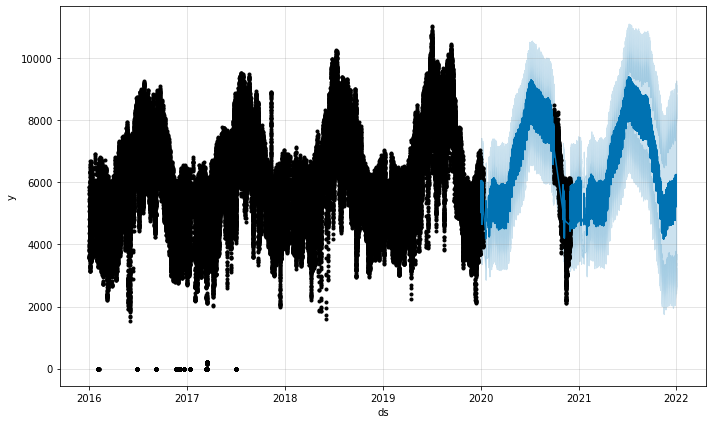

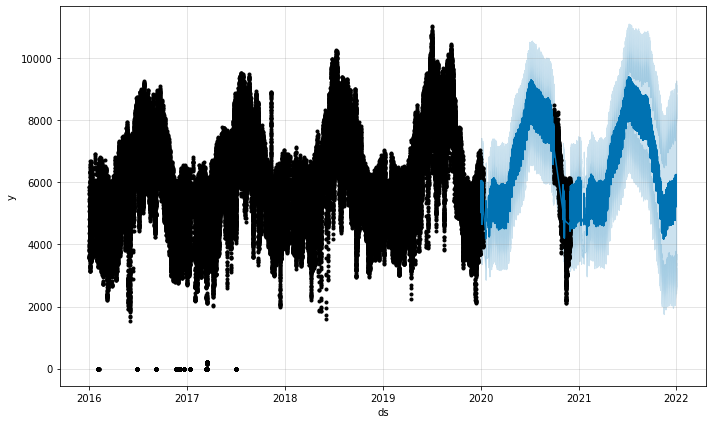

In [73]:
saved_mv_model.plot(test_forecast)

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot Actual Test Values

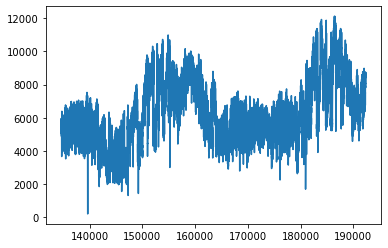

In [75]:
plt.plot(df_test['y'])
# plt.ylim([0, 12000])

## Plotting test forecast with actual test values

In [76]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
134625,2020-11-03 06:00:00,5508.71,13.0,9.0,76.68,0.0,0.0,0
134626,2020-11-03 06:15:00,5058.54,13.0,9.0,76.68,0.0,0.0,0
134627,2020-11-03 06:30:00,5055.95,13.0,9.0,76.68,0.0,0.0,0
134628,2020-11-03 06:45:00,5143.97,13.0,9.0,76.68,0.0,0.0,0
134629,2020-11-03 07:00:00,5255.28,13.0,8.0,71.66,0.0,0.0,0
...,...,...,...,...,...,...,...,...
192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [77]:
test_forecast.reset_index(inplace=True)

In [78]:
df_test.reset_index(inplace=True)

In [79]:
df_test

,index,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,134625,2020-11-03 06:00:00,5508.71,13.0,9.0,76.68,0.0,0.0,0
1,134626,2020-11-03 06:15:00,5058.54,13.0,9.0,76.68,0.0,0.0,0
2,134627,2020-11-03 06:30:00,5055.95,13.0,9.0,76.68,0.0,0.0,0
3,134628,2020-11-03 06:45:00,5143.97,13.0,9.0,76.68,0.0,0.0,0
4,134629,2020-11-03 07:00:00,5255.28,13.0,8.0,71.66,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
57692,192317,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
57693,192318,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
57694,192319,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
57695,192320,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [80]:
test_forecast

,index,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-01-02 00:00:00,6281.798511,4112.079424,6501.594201,6281.798511,6281.798511,-956.866227,-956.866227,-956.866227,...,118.390029,118.390029,118.390029,-998.736173,-998.736173,-998.736173,0.0,0.0,0.0,5324.932284
1,1,2020-01-02 00:15:00,6281.801395,4108.797104,6477.780483,6281.801395,6281.801395,-1002.623663,-1002.623663,-1002.623663,...,118.579415,118.579415,118.579415,-998.681652,-998.681652,-998.681652,0.0,0.0,0.0,5279.177731
2,2,2020-01-02 00:30:00,6281.804278,3922.127422,6383.963888,6281.804278,6281.804278,-1042.675155,-1042.675155,-1042.675155,...,118.761473,118.761473,118.761473,-998.627555,-998.627555,-998.627555,0.0,0.0,0.0,5239.129123
3,3,2020-01-02 00:45:00,6281.807162,3971.255974,6558.570071,6281.807162,6281.807162,-1076.990056,-1076.990056,-1076.990056,...,118.935767,118.935767,118.935767,-998.573882,-998.573882,-998.573882,0.0,0.0,0.0,5204.817105
4,4,2020-01-02 01:00:00,6281.810045,3967.242166,6462.116273,6281.810045,6281.810045,-1105.632181,-1105.632181,-1105.632181,...,119.101868,119.101868,119.101868,-998.520635,-998.520635,-998.520635,0.0,0.0,0.0,5176.177864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57692,57692,2021-12-31 22:45:00,6483.855426,3253.439307,8701.439210,4161.652597,9060.927259,-666.813990,-666.813990,-666.813990,...,109.231207,109.231207,109.231207,-1002.220217,-1002.220217,-1002.220217,0.0,0.0,0.0,5817.041436
57693,57693,2021-12-31 23:00:00,6483.858310,3105.761098,8534.728965,4161.391459,9061.141888,-734.371194,-734.371194,-734.371194,...,109.470679,109.470679,109.470679,-1002.143904,-1002.143904,-1002.143904,0.0,0.0,0.0,5749.487115
57694,57694,2021-12-31 23:15:00,6483.861193,2956.804046,8641.647273,4161.130320,9061.356517,-799.250001,-799.250001,-799.250001,...,109.683244,109.683244,109.683244,-1002.067990,-1002.067990,-1002.067990,0.0,0.0,0.0,5684.611192
57695,57695,2021-12-31 23:30:00,6483.864076,2841.364763,8676.274907,4160.869182,9061.571146,-860.356362,-860.356362,-860.356362,...,109.867782,109.867782,109.867782,-1001.992475,-1001.992475,-1001.992475,0.0,0.0,0.0,5623.507715


In [81]:
df_test.drop(columns='index')

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,2020-11-03 06:00:00,5508.71,13.0,9.0,76.68,0.0,0.0,0
1,2020-11-03 06:15:00,5058.54,13.0,9.0,76.68,0.0,0.0,0
2,2020-11-03 06:30:00,5055.95,13.0,9.0,76.68,0.0,0.0,0
3,2020-11-03 06:45:00,5143.97,13.0,9.0,76.68,0.0,0.0,0
4,2020-11-03 07:00:00,5255.28,13.0,8.0,71.66,0.0,0.0,0
...,...,...,...,...,...,...,...,...
57692,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
57693,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
57694,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
57695,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [82]:
test_forecast

,index,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-01-02 00:00:00,6281.798511,4112.079424,6501.594201,6281.798511,6281.798511,-956.866227,-956.866227,-956.866227,...,118.390029,118.390029,118.390029,-998.736173,-998.736173,-998.736173,0.0,0.0,0.0,5324.932284
1,1,2020-01-02 00:15:00,6281.801395,4108.797104,6477.780483,6281.801395,6281.801395,-1002.623663,-1002.623663,-1002.623663,...,118.579415,118.579415,118.579415,-998.681652,-998.681652,-998.681652,0.0,0.0,0.0,5279.177731
2,2,2020-01-02 00:30:00,6281.804278,3922.127422,6383.963888,6281.804278,6281.804278,-1042.675155,-1042.675155,-1042.675155,...,118.761473,118.761473,118.761473,-998.627555,-998.627555,-998.627555,0.0,0.0,0.0,5239.129123
3,3,2020-01-02 00:45:00,6281.807162,3971.255974,6558.570071,6281.807162,6281.807162,-1076.990056,-1076.990056,-1076.990056,...,118.935767,118.935767,118.935767,-998.573882,-998.573882,-998.573882,0.0,0.0,0.0,5204.817105
4,4,2020-01-02 01:00:00,6281.810045,3967.242166,6462.116273,6281.810045,6281.810045,-1105.632181,-1105.632181,-1105.632181,...,119.101868,119.101868,119.101868,-998.520635,-998.520635,-998.520635,0.0,0.0,0.0,5176.177864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57692,57692,2021-12-31 22:45:00,6483.855426,3253.439307,8701.439210,4161.652597,9060.927259,-666.813990,-666.813990,-666.813990,...,109.231207,109.231207,109.231207,-1002.220217,-1002.220217,-1002.220217,0.0,0.0,0.0,5817.041436
57693,57693,2021-12-31 23:00:00,6483.858310,3105.761098,8534.728965,4161.391459,9061.141888,-734.371194,-734.371194,-734.371194,...,109.470679,109.470679,109.470679,-1002.143904,-1002.143904,-1002.143904,0.0,0.0,0.0,5749.487115
57694,57694,2021-12-31 23:15:00,6483.861193,2956.804046,8641.647273,4161.130320,9061.356517,-799.250001,-799.250001,-799.250001,...,109.683244,109.683244,109.683244,-1002.067990,-1002.067990,-1002.067990,0.0,0.0,0.0,5684.611192
57695,57695,2021-12-31 23:30:00,6483.864076,2841.364763,8676.274907,4160.869182,9061.571146,-860.356362,-860.356362,-860.356362,...,109.867782,109.867782,109.867782,-1001.992475,-1001.992475,-1001.992475,0.0,0.0,0.0,5623.507715


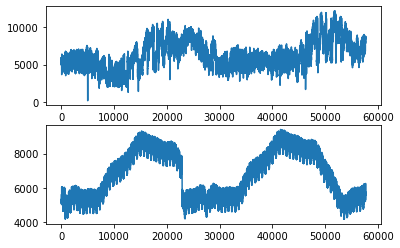

In [83]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

## Alignment Check

## Don't run alignment cells for now

In [49]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:30:00'].index, inplace=True)

In [50]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:45:00'].index, inplace=True)

In [51]:
# test_forecast.sort_index(inplace=True)

In [52]:
# df_test.sort_index(inplace=True)

In [53]:
# df_test.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
test_forecast.drop(columns='index', inplace=True)

In [55]:
test_forecast['ds'].shape == df_test['ds'].shape

True

In [56]:
test_forecast['ds'].dtype #== df_test['ds'].dtype

dtype('<M8[ns]')

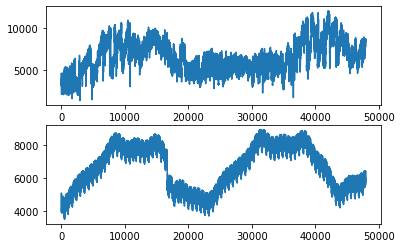

In [57]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

In [58]:
test_forecast['ds'][0] 

Timestamp('2020-03-09 00:00:00')

In [59]:
df_test['ds'][0]

'2020-03-09 14:45:00'

In [65]:
test_forecast = test_forecast.loc[test_forecast.ds >= '2020-03-09 14:45:00']

In [67]:
test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1,2020-03-09 14:45:00,5900.296544,3171.916007,5481.531455,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,-61.846437,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2020-03-09 15:00:00,5900.302799,3077.165376,5498.388928,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,-119.318514,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,2020-03-09 15:15:00,5900.309054,3066.869840,5327.756634,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,-169.916058,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,2020-03-09 15:30:00,5900.315309,3079.373219,5423.713692,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,-210.654249,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017
5,2020-03-09 15:45:00,5900.321564,3004.327760,5337.678558,5900.321564,5900.321564,-1729.323872,-1729.323872,-1729.323872,-239.006654,...,-91.000844,-91.000844,-91.000844,-1399.316374,-1399.316374,-1399.316374,0.0,0.0,0.0,4170.997693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,2021-12-31 22:45:00,6298.023692,2654.680851,8900.592688,3384.662319,8921.753386,-329.310619,-329.310619,-329.310619,129.036825,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,2021-12-31 23:00:00,6298.029948,2590.503862,8722.852109,3384.626040,8921.964441,-391.839718,-391.839718,-391.839718,66.243844,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,2021-12-31 23:15:00,6298.036203,2517.721908,8791.146777,3384.589761,8922.175495,-451.199784,-451.199784,-451.199784,6.650845,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,2021-12-31 23:30:00,6298.042458,2315.394237,8732.876186,3384.553482,8922.386549,-506.743298,-506.743298,-506.743298,-49.093332,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160


In [68]:
df_test.iloc[:test_forecast.shape[0]]

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
1,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
2,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
3,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
4,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
47937,2021-09-09 22:45:00,8625.34,29.0,27.0,88.99,89.0,9.4,100
47938,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
47939,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
47940,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82


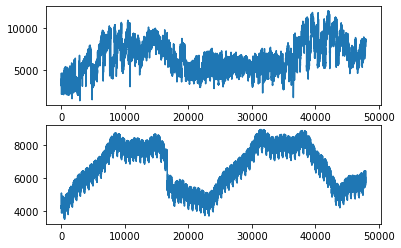

In [69]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

## Alignment Done

## Getting RMSE error

In [85]:
from sklearn.metrics import mean_squared_error
import numpy as np

rms = np.sqrt(mean_squared_error(df_test['y'], test_forecast['yhat']))

In [86]:
rms

2348.906924308038

In [87]:
df_test['ds'][:-1]

0       2020-11-03 06:00:00
1       2020-11-03 06:15:00
2       2020-11-03 06:30:00
3       2020-11-03 06:45:00
4       2020-11-03 07:00:00
                ...        
57691   2021-09-09 22:45:00
57692   2021-09-09 23:00:00
57693   2021-09-09 23:15:00
57694   2021-09-09 23:30:00
57695   2021-09-09 23:45:00
Name: ds, Length: 57696, dtype: datetime64[ns]

In [88]:
test_forecast['ds']

0       2020-01-02 00:00:00
1       2020-01-02 00:15:00
2       2020-01-02 00:30:00
3       2020-01-02 00:45:00
4       2020-01-02 01:00:00
                ...        
57692   2021-12-31 22:45:00
57693   2021-12-31 23:00:00
57694   2021-12-31 23:15:00
57695   2021-12-31 23:30:00
57696   2021-12-31 23:45:00
Name: ds, Length: 57697, dtype: datetime64[ns]

In [84]:
# df_test['ds'] = pd.to_datetime(df_test['ds'])

C:\Users\HP\AppData\Local\Temp/ipykernel_6900/3984643199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ds'] = pd.to_datetime(df_test['ds'])


In [85]:
# df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
1,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
2,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
3,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
4,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
47938,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
47939,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
47940,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
47941,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [89]:
df_test['y'].mean()

6208.30795812605

## Plot forecast and test values on same scale

<function matplotlib.pyplot.show(close=None, block=None)>

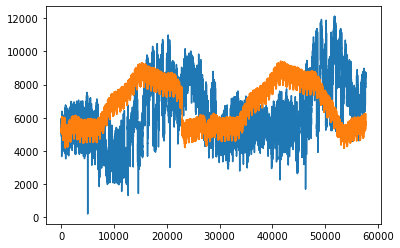

In [91]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(df_test['y'])
# ax[1].plot(test_forecast['yhat'])

plt.plot(df_test['y'])
plt.plot(test_forecast['yhat'])
plt.show

## Do from here

In [92]:
mx = df_test['y'].max()
mn = df_test['y'].min()

In [93]:
nrmse = rms/(mx - mn)

In [94]:
nrmse

0.19737801398322244

## Create future Dataframes

In [95]:
future = saved_mv_model.make_future_dataframe(periods=5*96, freq='H')

In [96]:
future.head()

,ds
0,2016-01-01 00:00:00
1,2016-01-01 00:15:00
2,2016-01-01 00:30:00
3,2016-01-01 00:45:00
4,2016-01-01 01:00:00


## Make future forecast

In [97]:
forecast = saved_mv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
134822,2020-12-19 19:45:00,5767.066880,4520.098270,6990.705614
134823,2020-12-19 20:45:00,5791.977770,4638.550668,6997.430183
134824,2020-12-19 21:45:00,5607.835671,4354.073637,6877.913808
134825,2020-12-19 22:45:00,5323.499314,4141.306254,6635.186989
134826,2020-12-19 23:45:00,5055.218766,3769.207684,6302.589164


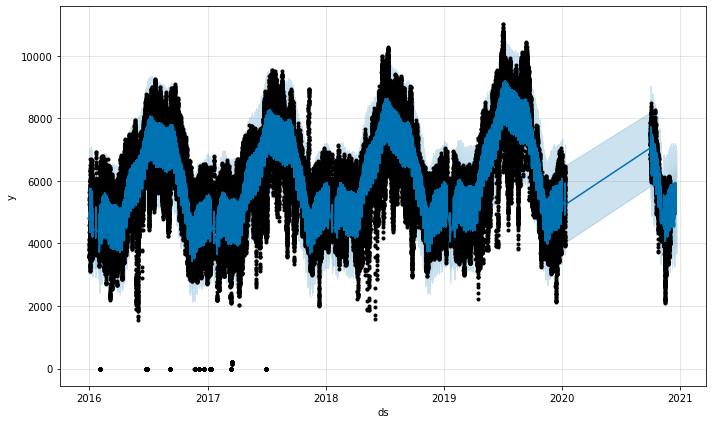

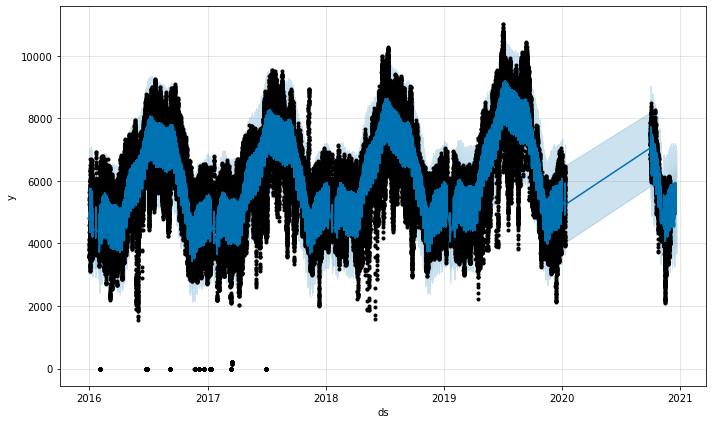

In [98]:
saved_mv_model.plot(forecast)